# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [58]:
# Import numpy and pandas

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [59]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [60]:
# Your code here:
sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [61]:
# Your code here:

sensor.isna().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [62]:
# Your code here:

sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`.

In [63]:
# Your code here:


In [64]:
date = pd.date_range(start = '1/1/2018 00:00:00', end = '1/1/2018 00:29:10', periods = 1751)
date


DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

Assign the time series index to the dataframe's index.

In [65]:
# Your code here:
# df.index = pd.DatetimeIndex(df['date'], freq='H')
# df.index

sensor['date']=date
sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,date
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,2018-01-01 00:00:00
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,2018-01-01 00:00:01
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,2018-01-01 00:00:02
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,2018-01-01 00:00:03
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,2018-01-01 00:00:04


In [66]:
#sensor.index = pd.DatetimeIndex(sensor['date'], freq='H')
#sensor.index

In [67]:
sensor.set_index('date', inplace = True)
sensor

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
date,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 00:29:06,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
2018-01-01 00:29:07,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
2018-01-01 00:29:08,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740


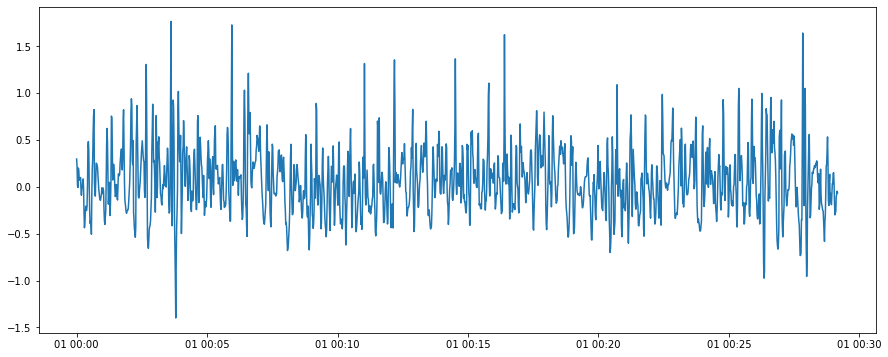

In [68]:
plt.plot(sensor['userAcceleration.x'])
plt.rcParams['figure.figsize']= (15,6)

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

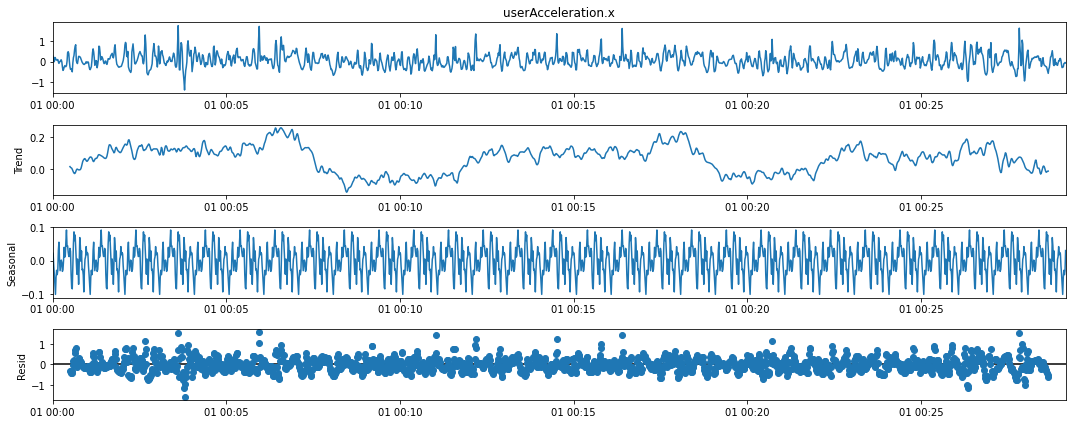

In [69]:
# Your code here:

dec = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], period=60)

dec.plot()
plt.show()

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

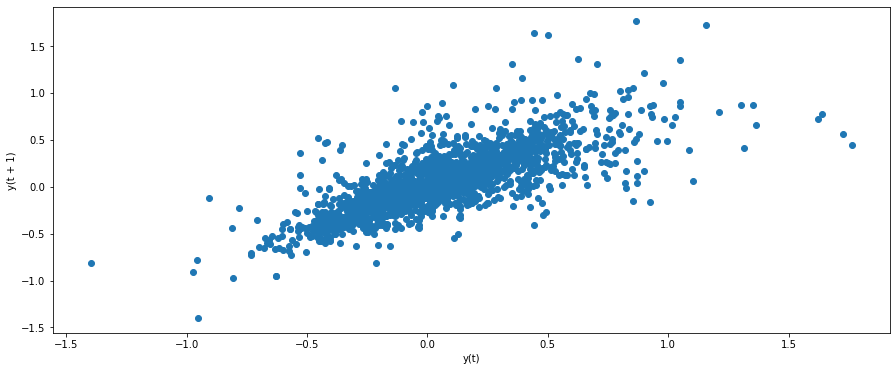

In [70]:
# Your code here:
from pandas.plotting import lag_plot
lag_plot(sensor['userAcceleration.x'])



In [71]:
# lag_plot(sensor['userAcceleration.x'])

Create a lag plot for `rotationRate.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

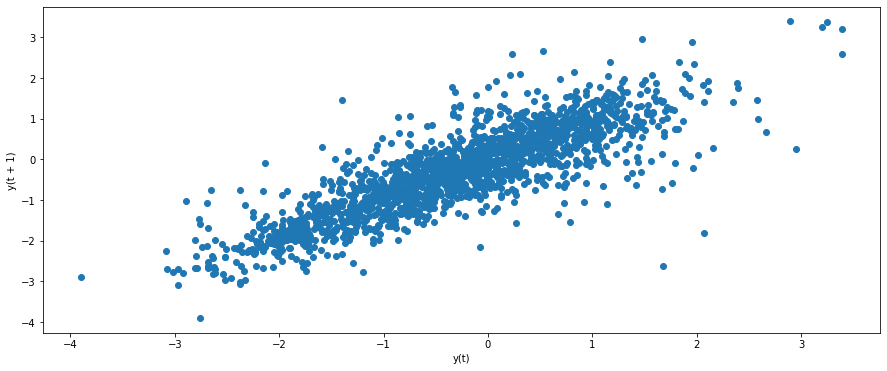

In [72]:
# Your code here:
from pandas.plotting import lag_plot
lag_plot(sensor['rotationRate.x'])

What are your conclusions from both visualizations?

In [73]:
# Your conclusions here:

# 

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [74]:
# Your code here:
from statsmodels.tsa.stattools import adfuller
# help(adfuller)
# adfuller(df.Humidity)

# # On First Differences

#adfuller(df[''userAcceleration.x'], df['rotationRate.x'][1:])
adfuller(sensor['userAcceleration.x'][1:])


(-17.944713346517077,
 2.8524818295408848e-30,
 4,
 1745,
 {'1%': -3.434102977404239,
  '5%': -2.8631977303784235,
  '10%': -2.5676525270728483},
 -728.4679663198244)

In [75]:
adfuller(sensor['rotationRate.x'][1:])

(-5.256592517330422,
 6.730887376833799e-06,
 25,
 1724,
 {'1%': -3.4341487606638452,
  '5%': -2.863217940480328,
  '10%': -2.5676632884862807},
 2616.375470321016)

What are your conclusions from this test?

In [76]:
# Your conclusions here:
# We reject the hypothesis because unit root is present (so the time series is not stationary) (H0)




Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [77]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(sensor['userAcceleration.x'], order=(2, 1)).fit()
print(model.params)

C:\Users\vicke\anaconda3\envs\kittycat\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\vicke\anaconda3\envs\kittycat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided,

const                       0.062549
ar.L1.userAcceleration.x    0.988781
ar.L2.userAcceleration.x   -0.378779
ma.L1.userAcceleration.x    0.182158
dtype: float64


In [78]:
#sensor[]

In [79]:
test.tail()

date
2018-01-01 00:29:06   -0.268367
2018-01-01 00:29:07   -0.102444
2018-01-01 00:29:08   -0.085590
2018-01-01 00:29:09   -0.048105
2018-01-01 00:29:10   -0.065011
Name: userAcceleration.x, dtype: float64

In [80]:
train.head(10)

date
2018-01-01 00:00:00    0.294894
2018-01-01 00:00:01    0.219405
2018-01-01 00:00:02    0.010714
2018-01-01 00:00:03   -0.008389
2018-01-01 00:00:04    0.199441
2018-01-01 00:00:05    0.168241
2018-01-01 00:00:06    0.079382
2018-01-01 00:00:07    0.069360
2018-01-01 00:00:08    0.072889
2018-01-01 00:00:09    0.098347
Name: userAcceleration.x, dtype: float64

In [81]:
(train, test) = sensor['userAcceleration.x'][:-10], sensor['userAcceleration.x'][-10:]

model = ARMA(sensor['userAcceleration.x'], order=(2, 1)).fit()
pred = model.predict(start=len(train), end=len(train)+10)
pd.DataFrame(zip(test, pred), columns = {'True Values', 'Prediction'})

C:\Users\vicke\anaconda3\envs\kittycat\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\vicke\anaconda3\envs\kittycat\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided,

,True Values,Prediction
0,0.149749,0.172776
1,0.038461,0.115159
2,-0.169175,-0.008270
3,-0.300361,-0.186762
4,-0.270174,-0.229211
5,-0.268367,-0.136440
6,-0.102444,-0.162658
7,-0.085590,0.035719
8,-0.048105,-0.043530
9,-0.065011,0.008415


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [83]:
# Your code here: eval_measures.rmse(x1, x2[, axis])
from statsmodels.tools.eval_measures import rmse

df = pd.DataFrame(zip(test, pred), columns = {'True Values', 'Prediction'})

#eval_measures.rmse(sensor['userAcceleration.x'], sensor['rotationRate.x'], axis=0)

NameError: name 'eval_measures' is not defined